In [4]:
import gp
from importlib import reload
import re
import numpy as np
import unittest
import yt
import gp_c
reload(gp_c)
import matplotlib.pylab as plt
from math import *

In [5]:
reload(gp)
shape=(128,128,128)
domain=( (-5,5.),(-5,5), ( -5 , 5 ))
geo=gp.geometry(shape,domain)

In [ ]:
sim = gp.gp_simulation( "out/phi_real00000/","out/phi_imag00000/",geo)
sim2 = gp.gp_simulation( "out/phi_real00330/","out/phi_imag00330/",geo)

In [3]:
%matplotlib notebook
x=np.sqrt(sim.x**2 + sim.y ** 2 + sim.z **2).flatten()
y=np.exp(-x**2/2 ) / (pi)**(3/4.)
plt.plot(x,sim.phi_real.flatten() **2 ,label="orig")
plt.plot(x, sim2.phi_real.flatten() **2 ,label="evolved")
plt.plot(x,y**2,label="sol")
#geo.step[0]*geo.step[1]*geo.step[2] *np.sum(y**2)
plt.legend()

NameError: name 'sim' is not defined

In [ ]:
float( sim.average(1.) )

In [ ]:
sim

In [ ]:
(1/pi)**(3.74)

In [6]:
alpha=1
r2 = geo.positions(0) **2 + geo.positions(1)**2 + geo.positions(2)**2
y=np.exp(- alpha * r2 )
lapY=(3*alpha + (- 2 * alpha**2 + 0.5 )*r2 ) * y
y2=gp_c.evaluate(y,y,geo)

<IPython.core.display.Javascript object>


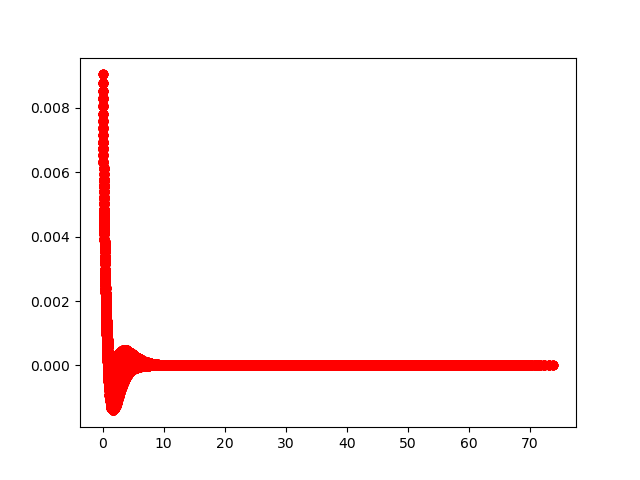

In [7]:
%matplotlib notebook
#plt.plot(r2.flatten(),y2.flatten() , "ob")
plt.plot(r2.flatten(),(lapY - y2).flatten(), "or")